# Exercise: NEISS, Question Set F

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **nss15.tsv**: injury data (one injury per row)
- **2017NEISSCodingManualCPSConlyNontrauma.pdf**: column definitions and explanations
- **2015 Neiss data highlights.pdf**: a partial summary of the data
- **2017ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Reading tab-separated files
- Ignoring bad lines
- Replacing values
- Using numpy/`np.nan`
- String search using regular expressions
- String replacement using regular expressions
- Using codebooks

# Read in `nss15.tsv`

Some of the lines just **aren't formatted correctly**. Maybe we can avoid those?

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("nss15.tsv", sep= "\t", error_bad_lines= False)

b'Skipping line 10822: expected 19 fields, saw 20\n'
b'Skipping line 48623: expected 19 fields, saw 20\nSkipping line 62534: expected 19 fields, saw 20\n'
b'Skipping line 103739: expected 19 fields, saw 20\n'
b'Skipping line 135495: expected 19 fields, saw 20\nSkipping line 151678: expected 19 fields, saw 20\n'
b'Skipping line 237135: expected 19 fields, saw 20\nSkipping line 240597: expected 19 fields, saw 20\n'
b'Skipping line 274270: expected 19 fields, saw 20\nSkipping line 277461: expected 19 fields, saw 20\n'


### Check that your dataframe has 357727 rows and 19 columns.

In [3]:
df.shape

(357727, 19)

### List the columns and their data types

In [4]:
df.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex              int64
race             int64
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1            int64
prod2          float64
narr1           object
narr2           object
dtype: object

### What does each column mean?

In [5]:
#The coding manual is a start but we should call the 1-800 number to define these columns to the best of our ability
#CPSC Case # == unique record number for each specific case
#trmt_date == the date when the patient was seen for treatment mm/dd/yy
#age == age of the patient
#sex == sex of the patient (1=Male, 2=Female, 0= not recorded)
#RACE == race of the patient (1=White, 2 = Black, 4= Asian, 5 = Native American, 6 = Native Hawaiian, 3 = Other, 0 = not stated) 
#diag == diagnoses (a long list of codes)
#body_part == body part affected
#prod1 == product associated with the injury, integer
#prod2 == NEISS allows up to two products to be assoc with the injury, the order doesn't matter, float

# Cleaning up a column

Take a look at the **race** column. How many rows of each race are there?

In [6]:
df["race"].value_counts()

1    145813
0    138666
2     48868
3     18884
4      4130
5      1000
6       366
Name: race, dtype: int64

## Replace the numbers with the appropriate words they stand for.

Those numbers are terrible - codes are fine for storage but not really for reading. **Replace the numbers with the  words they stand for.**

Refer to page 28 of the column definitions file.

In [7]:
# #Option 1 - very tedious way to replace a lot of numbers!
# df["race"] = df["race"].replace(1,"White").replace(2,"Black").replace(4,"Asian").replace(5, "Native American").replace(6, "Native Hawaiian").replace(3, "Other").replace(0, "not stated")

In [8]:
# # Option 2 - you need to remember the position of each category
# df["race"].replace([1, 2, 4, 5, 6, 3,0], ['White', 'Black', 'Asian', 'Native American', 'Native Hawaiian', 'Other', 'not stated'], inplace=True)

In [9]:
#Option 3 - to make multiple replacements, it's probably best to create a dictionary
replacements = {
    1: "White",
    2: "Black/African American",
    3: "Other",
    4: "Asian",
    5: "Native American",
    6: "Native Hawaiian",
    0: "not stated"
}

In [10]:
df["race"].replace(replacements, inplace=True)

## Confirm you have 145813 White, 138666 not stated, and 48868 Black.

In [11]:
df["race"].value_counts()

White                     145813
not stated                138666
Black/African American     48868
Other                      18884
Asian                       4130
Native American             1000
Native Hawaiian              366
Name: race, dtype: int64

## Graph the number of each race, but don’t included the “Not Stated” records

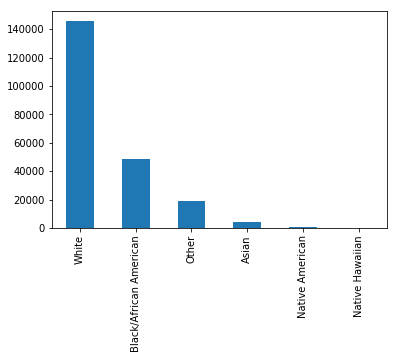

In [12]:
df[df["race"] != "not stated"]["race"].value_counts().plot(kind="bar")

## "Not Stated" seems silly - change it to be `NaN` instead

Don't use `na_values` for this.

In [13]:
df["race"].replace("not stated", np.nan, inplace=True)

In [14]:
df["race"].value_counts(dropna= False)

White                     145813
NaN                       138666
Black/African American     48868
Other                      18884
Asian                       4130
Native American             1000
Native Hawaiian              366
Name: race, dtype: int64

## Graph the count of each race, but don’t included the “Not Stated” records

Yes, again! The code you use should be different this time.

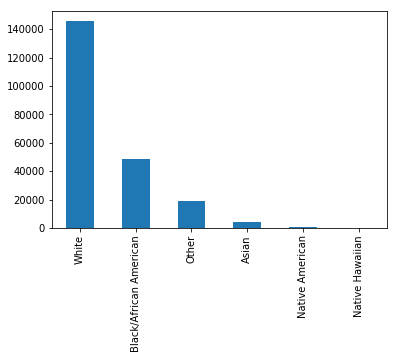

In [15]:
df["race"].value_counts().plot(kind='bar')

## Graph the top 10 most popular products for injuries 

In [16]:
df["prod1"].value_counts()

1842    28609
1807    28255
4076    16707
1205    14095
5040    12737
1211    11614
4074     8239
1884     7755
1893     7689
4057     7327
464      7281
611      7184
1267     7140
3299     7057
679      5081
1615     3673
4078     3665
1233     3197
4056     3116
5041     3063
1616     2949
1817     2933
1333     2858
1141     2831
1244     2692
604      2635
1871     2608
3265     2549
1894     2519
649      2475
        ...  
416         2
815         2
481         2
1531        1
958         1
558         1
401         1
116         1
1539        1
213         1
119         1
1350        1
932         1
5013        1
807         1
125         1
270         1
212         1
139         1
240         1
221         1
1517        1
236         1
462         1
1515        1
1739        1
1441        1
223         1
533         1
556         1
Name: prod1, Length: 757, dtype: int64

In [17]:
df["prod2"].value_counts()

1807.0    13652
4057.0     2114
1884.0     1910
676.0      1640
1842.0     1638
4076.0     1381
1615.0     1270
4056.0      859
4074.0      802
604.0       766
1829.0      642
611.0       633
1645.0      627
1893.0      574
1141.0      555
1817.0      480
679.0       480
474.0       453
1864.0      440
649.0       431
1819.0      420
1871.0      400
1135.0      373
1284.0      340
464.0       326
1865.0      275
3274.0      275
3299.0      268
478.0       266
1878.0      261
          ...  
1235.0        1
869.0         1
5001.0        1
5033.0        1
316.0         1
1299.0        1
650.0         1
653.0         1
808.0         1
2640.0        1
662.0         1
680.0         1
1376.0        1
1405.0        1
1557.0        1
1407.0        1
704.0         1
1409.0        1
1427.0        1
1433.0        1
1449.0        1
1456.0        1
1463.0        1
372.0         1
373.0         1
1505.0        1
1526.0        1
1529.0        1
1208.0        1
1712.0        1
Name: prod2, Length: 646

In [18]:
#add value_counts from prod1 and prod2
prodtotal = df["prod1"].value_counts().add(df["prod2"].value_counts())

In [19]:
#turn into a data frame
prodtotal_df = prodtotal.reset_index()

In [20]:
#rename the columns
prodtotal_df.rename(columns = {'index': 'product_code', 0: 'injuries_count'}, inplace=True)

In [21]:
#let's turn the product_code into integers to get rid of the decimals
prodtotal_df["product_code"] = prodtotal_df["product_code"].astype(int)

In [22]:
prodtotal_df["product_code"].head()

0    102
1    106
2    107
3    110
4    112
Name: product_code, dtype: int64

In [23]:
prodtotal_df["product_code"]= prodtotal_df["product_code"].astype(str).str.pad(4, fillchar="0", side="left")

In [24]:
prodtotal_df["product_code"].head()

0    0102
1    0106
2    0107
3    0110
4    0112
Name: product_code, dtype: object

In [25]:
#but these codes aren't very helpful, so let's import the coding book and get the definitions
#remember to add a header row with the list of header names
code_df = pd.read_csv("categories-cleaned.txt", names = ['product_code', 'meaning'])

In [26]:
code_df.head()

,product_code,meaning
0,102,Wringer washing machines
1,106,Electric clothes dryers without washers
2,107,Gas clothes dryers without washers
3,110,Electric heating pads
4,112,Sewing machines or accessories


In [27]:
#we need to pad the product codes
code_df["product_code"] = code_df["product_code"]. astype(str).str.pad(4, fillchar="0", side="left")

In [28]:
code_df[code_df["product_code"]=="1807"]

,product_code,meaning
608,1807,Floors or flooring materials


In [29]:
#let's merge our code_df with our original df
combined_df = prodtotal_df.merge(code_df, on= "product_code", how="outer")

In [30]:
combined_df[combined_df["product_code"] == "1807"]

,product_code,injuries_count,meaning
577,1807,41907.0,Floors or flooring materials


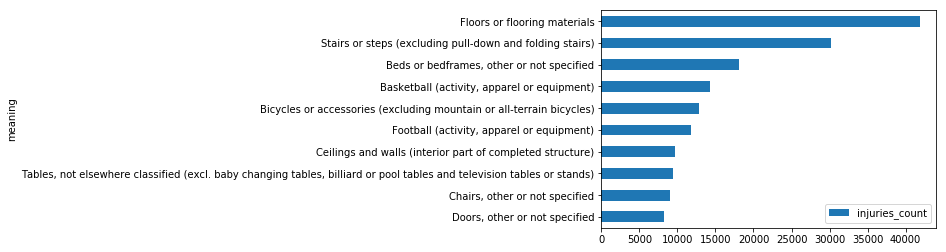

In [31]:
combined_df.sort_values(by="injuries_count", ascending=False).head(10).sort_values(by="injuries_count").plot(kind="barh", x="meaning")

# Cleaning up `race_other`

## `race_other` is a field for free-form race input. How many patients have a race of "HISPANIC"?

In [32]:
df[df["race_other"] == "HISPANIC"]

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
4,150721694,07/04/2015,42,74.8813,L,88,2,Other,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY
63,150418623,01/12/2015,40,15.0591,V,97,1,Other,HISPANIC,62,NaN,75,4,1,0,4076,NaN,97 YOM FOUND BY SON ON THE FLR APPARENTLY HAD ...,"DX CLOSED HEAD TRAUMA, NONHEMORRHAGIC"
90,160110393,12/17/2015,10,4.9655,C,2,2,Other,HISPANIC,55,NaN,32,6,1,0,679,NaN,2YOF FELLL FROM SOFA MOTHER PICKED HER UP FROM...,MAIDS ELBOW OF RIGHT UPPER EXTREMITY*
107,150727093,07/08/2015,51,74.8813,L,56,1,Other,HISPANIC,64,NaN,79,1,0,0,4076,NaN,"56 YO M, C/O LT HIP PAIN RADIATING TO LT THIGH...",LLED OUT OF BED DX LT GLUTEAL MUSCLE STRAIN
197,150705170,06/10/2015,90,5.6748,C,4,1,Other,HISPANIC,57,NaN,36,1,1,0,1842,NaN,4YOM- MOM SYAS SHE HEARD TOW THUMPS SOUNDS FOU...,OF STAIRS CRYING NOW PAIN TO LEG. DX- LEFT TIB...
243,150406329,03/21/2015,90,5.6748,C,10,1,Other,HISPANIC,62,NaN,31,1,0,0,1242,NaN,10 YOM WAS GOING DOWN A SLIDE & A CHILD RAN IN...,"CHEST WITH HIS HEAD- PAIN- VOMITED 4 X, TODAY..."
254,150423306,04/05/2015,24,97.9239,M,15,1,Other,HISPANIC,59,NaN,35,1,4,0,1333,1125.0,"*15YOM,SKATEBOARDING JUMPED AN CAUGHT KNEE ON ...","KNEE,LAC QUADRICEPS MUSCLE"
258,150247741,02/17/2015,90,5.6748,C,33,2,Other,HISPANIC,65,NaN,85,2,1,0,1807,NaN,33 YOF WAS IN HOUSE THAT WAS FOUND TO HAVE MOL...,"MOLD ON FLOORS. DX; MOLD EXPOSURE, RESP. ILLN..."
325,150502952,04/22/2015,41,15.0591,V,34,2,Other,HISPANIC,64,NaN,89,1,1,0,1842,NaN,34YOF FELL DOWN THE STAIRS AT HOME. DX NECK ST...,NaN
338,150518750,04/24/2015,54,49.2646,M,211,2,Other,HISPANIC,62,NaN,75,1,1,0,1144,NaN,"11MOF MOM HOLDING 10LB BAG OF MEAT, IT SLIPPED...",D DX: HEAD INJURY


In [33]:
df[df["race_other"] == "HISPANIC"].shape

(14389, 19)

## What are the top 5 most popular "other" races?

In [34]:
df["race_other"].value_counts()

HISPANIC           14389
MULTI-RACIAL        1727
UNKNOWN             1554
HISP                1334
NS                   495
SOMALI               318
MULTIRACIAL          146
UNKN                 105
BIRACIAL              32
MULTI                 22
NEPALI                20
DECLINED              15
UKNOWN                14
MULTI RACIAL          12
`                     10
MEXICAN               10
ARAB                   7
MIXED                  7
ARABIC                 7
RUSSIAN                6
PUERTO RICAN           6
FULANI                 6
SPANISH                6
HINDI                  4
TWI                    4
HISPNANIC              3
ETHIOPIAN              3
ARMENIAN               3
MIDDLE EASTERN         3
SOMALIAN               2
                   ...  
UNKNONWN               1
SOMLI                  1
FRENCH                 1
HISPANI                1
HISPAINIC              1
ISPANIC                1
MULT RACIAL            1
HISO                   1
M                      1


## Searching for multiracial patients

Wow, this data entry is terrible. “Multiracial” is spelled as **MULT RACIAL**, **MULTIPLE RACIAL**, and many more. How many different spellings can you find? **Use only one line to find the spellings.**

- Tip: Be sure to **ignore the na values**.
- Tip: You should probably find the multiracial-ish rows and then `value_counts` their `other_race`
- Tip: Maybe... ask me about .str.contains support for regular expressions?

In [35]:
df[df["race_other"].str.contains("mult.*", case=False, na=False)]["race_other"].value_counts()

MULTI-RACIAL       1727
MULTIRACIAL         146
MULTI                22
MULTI RACIAL         12
MULT RACIAL           1
MULTIPLE RACIAL       1
MULTRACIAL            1
MULTIRACAIL           1
Name: race_other, dtype: int64

## Replace all of those spellings with “MULTIRACIAL.”

Confirm that you’ve ended up with about 1900 MULTIRACIAL rows (yours might be anywhere between 1899-1910, depending on how many spellings you caught)

In [36]:
df["race_other"] = df["race_other"].str.replace("mult.*", "MULTIRACIAL", case=False)

In [37]:
df[df["race_other"].str.contains("mult.*", case=False, na=False)]["race_other"].value_counts()

MULTIRACIAL    1911
Name: race_other, dtype: int64

## Do the same thing with misspellings of "Unknown"

You should end up with around 1660-1670 UNKNOWN entries

In [38]:
df[df["race_other"].str.contains("Un.*", case=False, na=False)]["race_other"].value_counts()

UNKNOWN     1554
UNKN         105
UNK            2
UNNOWN         1
UNKNOKWN       1
UNKNONWN       1
UNKNKOWN       1
UNKOWN         1
UNKNONW        1
Name: race_other, dtype: int64

In [39]:
df["race_other"] = df["race_other"].str.replace("Un.*", "Unknown", case=False)

In [40]:
df[df["race_other"].str.contains("Un.*", case=False, na=False)]["race_other"].value_counts()

Unknown    1667
Name: race_other, dtype: int64

## What variations on HISPANIC can you find? Standardize them to HISPANIC.

In [41]:
df[df["race_other"].str.contains("hisp.*", case=False, na=False)]["race_other"].value_counts()

HISPANIC           14389
HISP                1334
HISPNANIC              3
HISPAINC               1
HISPANIE               1
HISPPANIC              1
HISPAANIC              1
QRYOMHISPANIC          1
HISPANIC/LATINO        1
HISPANIC S/P B         1
HISPNIC                1
HISPAINIC              1
HISPANI                1
Name: race_other, dtype: int64

In [42]:
df["race_other"] = df["race_other"].str.replace("hisp.*", "HISPANIC", case=False)

## Now try counting the number of hispanic people again.

In [43]:
df[df["race_other"] == "HISPANIC"].shape

(15735, 19)

## Seems like a lot! Update their race column to be ‘Hispanic’ instead of “Other”

You'll try to do this using skills you know, but pandas will probably yell at you. You get to learn this new thing called `loc` now! 

```
df.loc[df.country == 'Angola', "continent"] = "Africa"
```

This updates the `continent` column to be `Africa` for every row where `country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

In [67]:
# df.loc[row selection, column selection]
# row selection = df["race_other"] == "HISPANIC"
# column selection = df["race"]
df.loc[df.race_other == "HISPANIC", "race"] = "Hispanic"

In [68]:
df.race.value_counts()

White                     145131
Black/African American     48848
Hispanic                   15735
Asian                       4124
Other                       3936
Native American              998
Native Hawaiian              364
Name: race, dtype: int64

## Graph the frequency of each race in the dataset

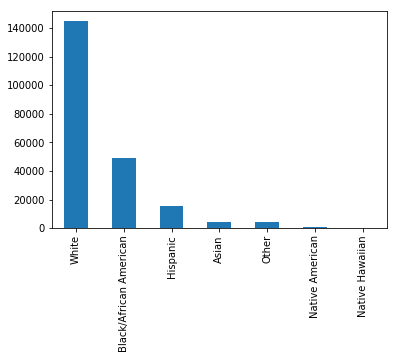

In [69]:
df.race.value_counts().plot(kind='bar')

## Find every injury involving unicycles.

In [78]:
df[df.prod1== 1283]

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
4171,150744255,06/23/2015,8,5.6748,C,12,2,White,NaN,57,NaN,33,1,0,0,1283,NaN,12YOF FELL OFF A UNICYCLE; FOREARM FX.,NaN
46499,150502967,04/22/2015,41,15.0591,V,62,1,NaN,NaN,57,NaN,33,4,9,0,1283,NaN,62YOM RIDING A UNICYCLE AT THE PARK AND FELL. ...,NaN
51052,150337697,03/15/2015,67,15.0591,V,9,2,NaN,NaN,71,ARM PAIN,33,1,8,0,1283,NaN,DX PN RT ARM 9YOF PATIENT WITH RT ARM PN SHE H...,FELL OFF UNICYCLE AT SCHOOL NOW WITH ARM PAIN RT
119639,151223619,12/08/2015,51,74.8813,L,56,1,Black/African American,NaN,71,PAIN,35,6,0,0,1283,1807.0,56 YO M PT WAS TRYING TO TEACH A COUPLE OF KID...,FELL BACKWARDS ONTO FLOOR C/O LEFT KNEE PAIN W...
180961,150919495,08/18/2015,93,15.7762,V,52,1,White,NaN,53,NaN,79,1,4,0,1283,NaN,52 YOM WAS UNICYCLING DOWN STREET WHEN HE WAS ...,AT LOW SPEED. DX: COCCYGEAL CONT.


In [96]:
df[df["narr2"].astype(str).str.contains("unicy.*", case=False)]

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
51052,150337697,03/15/2015,67,15.0591,V,9,2,NaN,NaN,71,ARM PAIN,33,1,8,0,1283,NaN,DX PN RT ARM 9YOF PATIENT WITH RT ARM PN SHE H...,FELL OFF UNICYCLE AT SCHOOL NOW WITH ARM PAIN RT


## What is the racial breakdown of people involved in unicycle accidents?

I want a **percentage**, and I want that percentage to include unknowns/NaN values.

In [100]:
df[df.prod1== 1283]["race"].value_counts(normalize=True, dropna=False)

White                     0.4
NaN                       0.4
Black/African American    0.2
Name: race, dtype: float64

## How about injuries with toboggans?

Is the racial breakdown significantly different than the racial breakdown of all patients?

In [101]:
df[df.prod1== 1273]["race"].value_counts(normalize=True, dropna=False)

NaN         0.555556
White       0.333333
Hispanic    0.111111
Name: race, dtype: float64

In [98]:
df[df.prod2== 1273]["race"].value_counts(dropna=False)

Series([], Name: race, dtype: int64)

## Find the top 5 most dangerous products

Just use the `prod1` column.

In [103]:
code_df.dtypes

product_code    object
meaning         object
dtype: object

In [104]:
#let's merge the code_df with df for the results to be meaningful
#pad prod1 first
df["prod1"]= df["prod1"].astype(str).str.pad(4, fillchar="0", side="left")

In [105]:
df["prod1"].value_counts()

1842    28609
1807    28255
4076    16707
1205    14095
5040    12737
1211    11614
4074     8239
1884     7755
1893     7689
4057     7327
0464     7281
0611     7184
1267     7140
3299     7057
0679     5081
1615     3673
4078     3665
1233     3197
4056     3116
5041     3063
1616     2949
1817     2933
1333     2858
1141     2831
1244     2692
0604     2635
1871     2608
3265     2549
1894     2519
0649     2475
        ...  
0808        2
1854        2
1718        2
1517        1
0213        1
0240        1
0116        1
0125        1
0556        1
1739        1
0270        1
0401        1
5013        1
0212        1
1539        1
0558        1
0221        1
0236        1
0139        1
0119        1
1531        1
0462        1
0932        1
0958        1
1350        1
1515        1
0533        1
0807        1
1441        1
0223        1
Name: prod1, Length: 757, dtype: int64

In [106]:
total_df = df.merge(code_df, left_on= "prod1", right_on="product_code", how="outer")

In [110]:
total_df.meaning.value_counts().head()

Stairs or steps (excluding pull-down and folding stairs)                28609
Floors or flooring materials                                            28255
Beds or bedframes, other or not specified                               16707
Basketball (activity, apparel or equipment)                             14095
Bicycles or accessories (excluding mountain or all-terrain bicycles)    12737
Name: meaning, dtype: int64

## Find the top 5 most dangerous products by race

This is that weird groupby thing that you can either memorize or cut and paste every time. If you ask I'll tell it to you and you won't have to search!

In [112]:
total_df.groupby("race")["meaning"].value_counts().groupby(level=0).head()

race                    meaning                                                             
Asian                   Stairs or steps (excluding pull-down and folding stairs)                  310
                        Floors or flooring materials                                              253
                        Beds or bedframes, other or not specified                                 219
                        Basketball (activity, apparel or equipment)                               203
                        Bicycles or accessories (excluding mountain or all-terrain bicycles)      198
Black/African American  Stairs or steps (excluding pull-down and folding stairs)                 4377
                        Basketball (activity, apparel or equipment)                              4249
                        Football (activity, apparel or equipment)                                3030
                        Floors or flooring materials                                       